<center> <h1> BASES DE DONNEES </h1> </center> </br> <center> <h2> Présentation et utilisation <h2> </center>

<center><img src=" 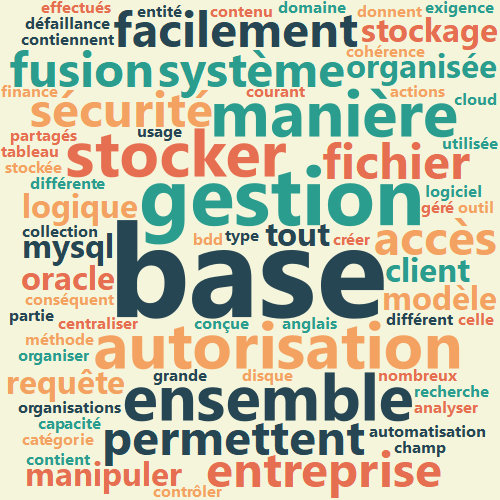"/></center>

# Table des matières

___

* [Introduction](#1)
* [Base de données / Fichier de données quelle différence ?](#2)
* [Quel est l'intérêt d'une base de données ?](#3)
* [Créer sa base de données](#4)
    * [Créer une base de données vierge](#4_1)
    * [Insérer nos tables](#4_2)
* [Interroger la base de données](#5)

## Introduction / Qu'est ce qu'une base de données ? <a class="anchor" id="1"></a>

___

Une des premières choses qu'on entend lorsqu'on parle de données, c'est le concept de base de données. Une base de données, c'est un **coffre qui stocke un ensemble d'informations, gère qui y a accès, et quand** (n'importe qui ne doit pas avoir accès aux fichiers des salaires de l'entreprise, par exemple). Un fichier de donnée sur un tableur n'est donc pas une base de données à lui tout seul. À l'intérieur de cette base de données, on peut **trier et récupérer les fichiers** au travers d'un langage qui lui est propre, le **SQL**. Très facilement compréhensible, il permet un **gain de temps non-négligeable**.

## Base de données / Fichier de données quelle différence ? <a class="anchor" id="2"></a>
___

Pour vous montrer l'intérêt d'une base de données, prenons ce fichier contenant les noms des joueurs de l'équipe de football masculine du Paris Saint-Germain (vous n'avez pas besoin de connaissances sur le football pour comprendre l'exemple, pas d'inquiétude).

![title]( 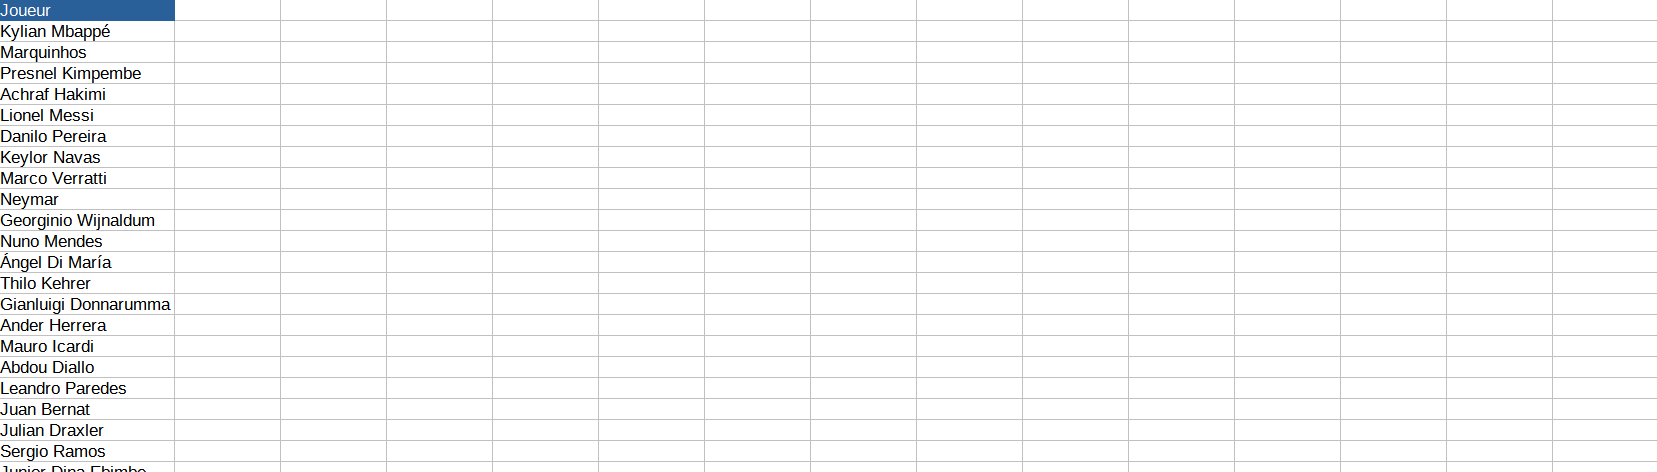)

Ajoutons ensuite diverses informations comme le championnat dans lequel joue ces joueurs, le pays auquel correspond le championnat, le nombre d'équipes présentes, le champion de l'année dernière et le champion de cette année :

![title]( 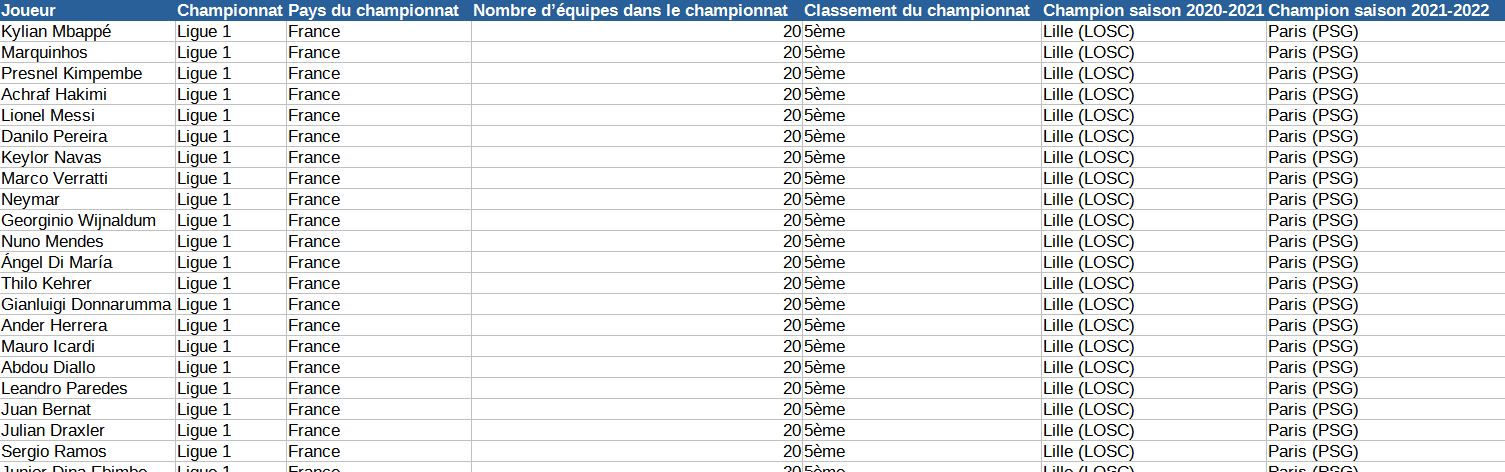)

Vous ne voyez pas toutes les lignes, mais quelque chose d'étrange apparaît : les informations sont les mêmes dans chaques colonnes. N'y a-t-il donc pas un moyen de n'avoir à écrire qu'une seule fois ces informations ? Et bien si ! On va créer un fichier joueur et un autre fichier en rapport avec le championnat.

![title]( 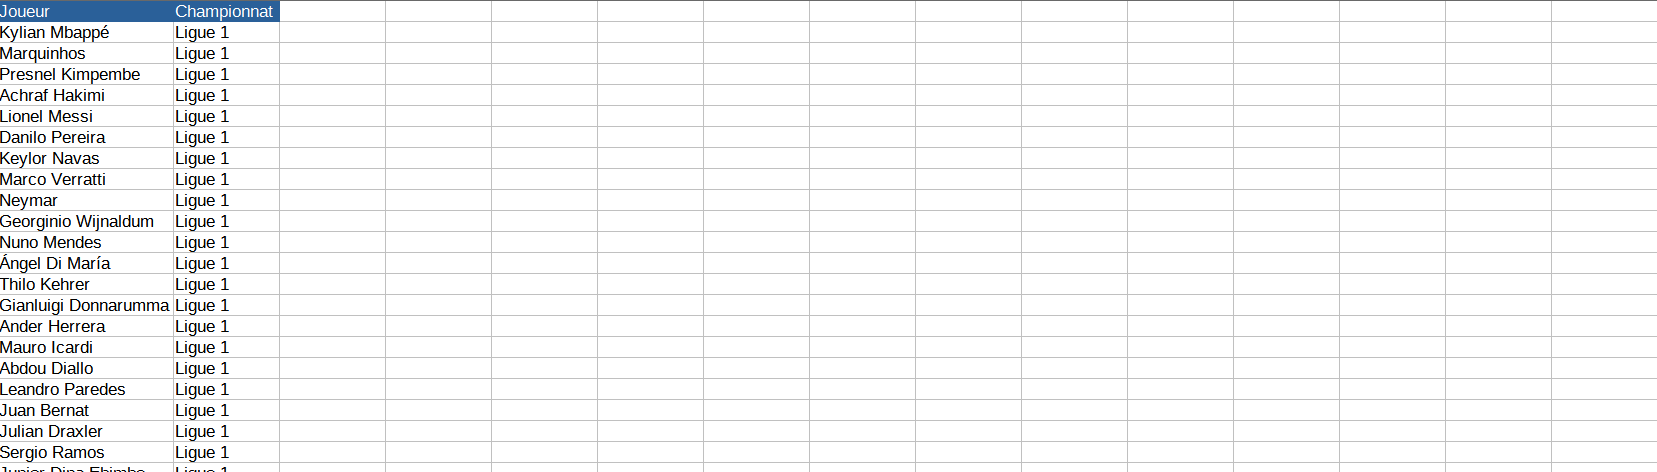) 

![title]( 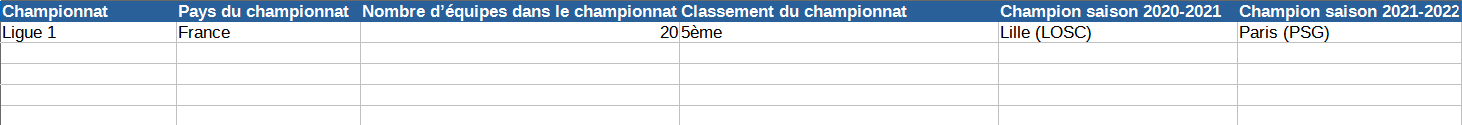)

D'un côté, sans compter les variables, on a un seul fichier de 37 lignes et 7 colonnes, soit **259 "données"**. De l'autre on a un fichier de 37 lignes et 2 colonnes = 74 et un fichier de 1 ligne et 6 colonnes = 6 soit 74 + 6 = **80 "données"**, plus de **3 fois moins** ! Chaque donnée demandant de la place pour être stockée, imaginez donc le gain lorsqu'on veut stocker des fichiers de plusieurs milliers de lignes et colonnes ... 

## Quel est l'intérêt d'une base de données ? <a class="anchor" id="3"></a>
___

Une base de données va servir à **stocker** ces différents fichiers et permettre de les **relier** entre eux lorsque c'est nécessaire uniquement. Pour cela, les fichiers ont besoin de **clefs**, c'est-à-dire des colonnes communes à chaques fichiers, afin d'être associés entre eux. Dans notre cas, la colonne commune est "championnat".

![title]( 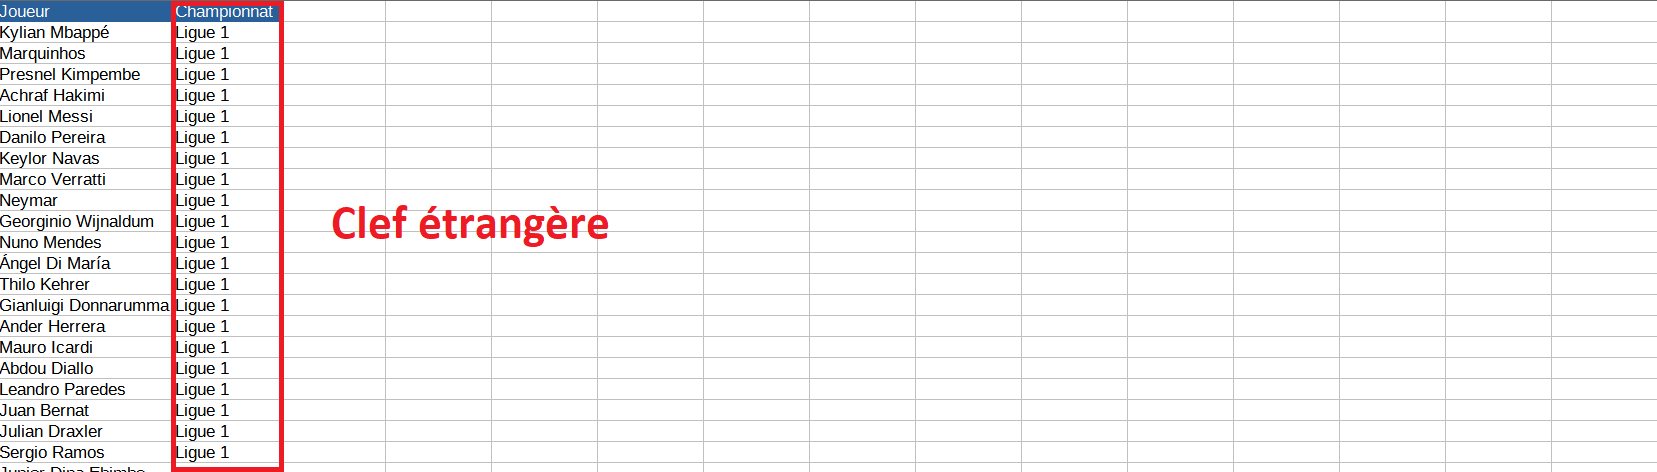)

![title]( 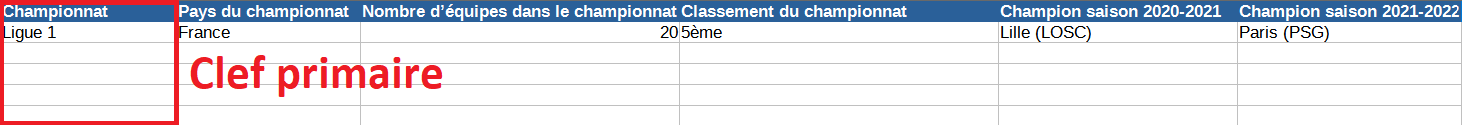)

Dans le fichier "LIGUE 1", on dit que la colonne championnat est *clef primaire*, puisque c'est l'emplacement dans lequel elle est censée être, tandis que la colonne championnat est appelée *clef étrangère* dans le fichier "JOUEURS" puisqu'elle n'est présente que pour être reliée à "LIGUE 1". LIGUE 1 et JOUEURS sont appelées des tables, elles constitueront notre base de données. 

## Créer sa base de données <a class="anchor" id="4"></a>

___

Afin de ne pas passer des heures sur des systèmes de gestion de bases de données (SGBD) inutilement complexes, on va utiliser **SQLite**, une "base de données" minitiature directement disponible sur Python grâce à la librairie *SQLite*. La suite de ce tutoriel va vous apprendre à créer cette base de données à partir des 2 tables présentées précédemmment, JOUEUR et CHAMPIONNAT.

Vous aurez besoin de :

In [ ]:
pip install Pandas

### Créer une base de donnée vierge <a class="anchor" id="4_1"></a>

Il faut d'abord créer notre base de données vierge, qu'on nommera "football". Elle sera accessible au travers de la connexion nommée "connection".

In [ ]:
import sqlite3 # on importe la librairie SQLite

connection = sqlite3.connect('football.db') 

Puis un curseur, qui permet d'aller à l'intérieur de notre base de données pour en sortir des informations.

In [ ]:
curseur = connection.cursor()

### Insérer nos tables dans la base de données vierge <a class="anchor" id="4_2"></a>

À l'intérieur de cette base de données vierge, on va insérer nos 2 tables LIGUE 1 et JOUEURS. La mention "index=False" permet de ne pas considérer le numéro des lignes comme une colonne à part entière.

In [ ]:
import pandas as pd 

JOUEURS = pd.read_csv('data/JOUEURS.csv') # on importe nos 2 fichiers de données
LIGUE_1 = pd.read_csv('data/LIGUE_1.csv')

JOUEURS.to_sql('JOUEURS', connection, if_exists='replace', index=False) # on les insère dans la base de données
LIGUE_1.to_sql('LIGUE_1', connection, if_exists='replace', index=False)

## Interroger la base de données <a class="anchor" id="5"></a>

___

Pour vérifier que nos instructions ont fonctionné, on va interroger notre base de données au travers du langage SQL, dédié pour les bases de données :

In [ ]:
for row in curseur.execute('SELECT * FROM JOUEURS LIMIT 5'): # Parmi toutes les lignes dans JOUEURS,
                                                             # on sélectionne toutes les informations des 5 premières lignes 
        print(row) # afficher les lignes sélectionnées

In [ ]:
for row in curseur.execute('SELECT * FROM LIGUE_1 LIMIT 5'):
        print(row)

Si on veut fusionner les tables, on va réaliser une *fusion*, qui se fait au travers des clefs primaires et étrangères. On va sélectionner la table JOUEURS et lui ajouter la table LIGUE_1, en lui précisant que cet ajout doit se faire à partir de la colonne identique "championnat", présente dans les 2 tables.

In [ ]:
for row in curseur.execute('SELECT * FROM JOUEURS JOIN LIGUE_1 ON JOUEURS.championnat=LIGUE_1.championnat LIMIT 5'):
        print(row)

Ainsi, on peut stocker la table fusionnée dans un tableau de données grâce à l'instruction *pd.read_sql_query()*

In [ ]:
JOUEURS_et_LIGUE_1 = pd.read_sql_query("SELECT * FROM JOUEURS JOIN LIGUE_1 ON JOUEURS.championnat=LIGUE_1.championnat", connection)
JOUEURS_et_LIGUE_1.head(5)

La fusion se faisant à partir de 2 colonnes identiques, il est logique que cette même colonne apparaisse 2 fois dans notre nouvelle table, ce n'est pas un problème.